In [1]:
!git clone https://github.com/ahmedramadan96/EALPR.git

Cloning into 'EALPR'...
remote: Enumerating objects: 18740, done.
remote: Counting objects: 100% (12906/12906), done.
remote: Compressing objects: 100% (12903/12903), done.
remote: Total 18740 (delta 12), reused 12892 (delta 3), pack-reused 5834
Receiving objects: 100% (18740/18740), 273.19 MiB | 13.21 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (18735/18735), done.


In [2]:
import os
import cv2
import tensorflow as tf
import seaborn as sn

import numpy as np
import plotly.express as px 
import pandas as pd
import shutil
import matplotlib.pyplot as plt

In [3]:
def mean_hieght_width(img_path):
    h=0
    w=0
    for img in img_path:
        img = cv2.imread(str('./EALPR/final/plates_img/'+file_path),0)
        img_h,img_w = img.shape
        h+=img_h
        w+= img_w
    h= h/len(img_path)
    w= w/len(img_path)
    print(h,w)
    return h,w


# h,w=mean_hieght_width(images_paths)
h,w = 165 ,77 # best image size for model

In [4]:
def convert(bx,by,bw,bh):
    xmx=((2*w*bx+w*bw)/2)
    xmn=(2*w*bx-xmx)
    ymx=((2*h*by+h*bh)/2)
    ymn=(2*h*by-ymx)
    return xmn,xmx,ymn,ymx

### *Get Labels from class file*

In [5]:
labels_class_name='./EALPR/EALPR- LP characters dataset/Characters Labeling/classes.txt'
class_labels_dict={}
class_labels_list=[]
with open(labels_class_name) as cur: 
    info = cur.readlines() 
    for i in range(len(info)):
        class_labels_dict[info[i][0]] = i
        class_labels_list.append(info[i][0])
    cur.close()
print(class_labels_dict)
print('classes number:',len(class_labels_dict))

{'أ': 0, 'ب': 1, 'ج': 2, 'د': 3, 'ر': 4, 'س': 5, 'ص': 6, 'ط': 7, 'ع': 8, 'ف': 9, 'ق': 10, 'ل': 11, 'م': 12, 'ن': 13, 'ھ': 14, 'و': 15, 'ى': 16, '٠': 17, '١': 18, '٢': 19, '٣': 20, '٤': 21, '٥': 22, '٦': 23, '٧': 24, '٨': 25, '٩': 26}
classes number: 27


In [6]:
# class_labels_list=[]
class_labels_list

['أ',
 'ب',
 'ج',
 'د',
 'ر',
 'س',
 'ص',
 'ط',
 'ع',
 'ف',
 'ق',
 'ل',
 'م',
 'ن',
 'ھ',
 'و',
 'ى',
 '٠',
 '١',
 '٢',
 '٣',
 '٤',
 '٥',
 '٦',
 '٧',
 '٨',
 '٩']

# Prepare **Y**

In [7]:
labels_path='./EALPR/EALPR- LP characters dataset/Characters Labeling'
first_files=os.listdir(labels_path)
if os.path.exists('./EALPR/final/plates_img'):
    pass
else:
    os.makedirs('./EALPR/final/plates_img')
    os.makedirs('./EALPR/final/plates_labels/')

In [8]:
check=0


In [9]:
# testing
file=first_files[0]
y_2d=[]
new_label_path='./EALPR/final/plates_labels/'
new_img_path = './EALPR/final/plates_img/'
old_img_path='./EALPR/EALPR- Plates dataset/'
x=file.split('.')[0]+'.png'
img= './EALPR/EALPR- Plates dataset'
# shutil.copyfile(original, target)
if check==0 :
    check=1
    for file in os.listdir(labels_path):
        if file=='classes.txt':
            continue
        with open(labels_path+'/'+file) as cur:
        #             print(cur)
                    info = cur.readlines()
                    c=0
                    for i in info:  # str
        #                     print(i)
                            tmp = i.split()  # list of i

                            new_label=f"{new_label_path}C{tmp[0]}-{file}"
        #                     print(formated_name) 
                            if os.path.exists(new_label):
                                img= f"{new_img_path}C{tmp[0]}-({c}){file.split('.')[0]}.png"
                                img= r'{}'.format(img)
                                shutil.copyfile(old_img_path+file.split('.')[0]+'.png', img)
                                new_label=f"{new_label_path}C{tmp[0]}-({c}){file}"
                                c+=1
                                f = open(new_label,'w')
                                f.write(i)
                                f.close()
                            else:
                                img= f"{new_img_path}C{tmp[0]}-{file.split('.')[0]}.png"
                                img= r'{}'.format(img)
                                shutil.copyfile(old_img_path+file.split('.')[0]+'.png', img)
                                f = open(new_label,'w')
                                f.write(i)
                                f.close()
#                             for i in range(len(tmp)):
#                                 tmp[i] = float(tmp[i])
#                             y_2d.append(tmp)

# y_2d

In [ ]:
images_paths=os.listdir('./EALPR/final/plates_img/')
labels_paths=os.listdir('./EALPR/final/plates_labels/')
labels_paths.sort()
images_paths.sort()

images_paths[10:23],labels_paths[10:23]

# Prepare *Y*

In [11]:
# path = 'EALPR/EALPR Vechicles dataset/Vehicles Labeling'
y_2d=[]
for filename in labels_paths:
    filePath=new_label_path+"/"+filename
    with open(filePath) as cur:
        info = cur.readline()
        info=info.split()
        y_2d.append([int(info[0])/len(class_labels_list),float(info[1]),float(info[2]),float(info[3]),float(info[4])])   #ymax
        cur.close()

In [12]:
Y= np.array(y_2d,dtype=object)
Y.shape

(10797, 5)

# Prepare *X* (images in gray scale)

In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
#Targeting all our values in array selecting all columns
data = []
output = []
for ind in range(len(images_paths)):
    image = images_paths[ind]
    img_arr = cv2.imread(str('./EALPR/final/plates_img/'+image),0)
    img_arr= cv2.resize(img_arr, (165 ,77))
    norm_load_image_arr= img_arr /255.
#     h,w,d = img_arr.shape
    # Prepprocesing
#     load_image = load_img(str('./EALPR/final/plates_img/'+image),target_size=(224,224))
#     load_image_arr = img_to_array(load_image)
#     norm_load_image_arr = load_image_arr/255.0 # Normalization
    # Normalization to labels
#     label_norm=[]
#     cl,xmin,xmax,ymin,ymax = Y[ind]
#     nxmin,nxmax = xmin/w,xmax/w
#     nymin,nymax = ymin/h,ymax/h
#     label_norm.append([cl,nxmin,nxmax,nymin,nymax]) # Normalized output
        # Append
    data.append(norm_load_image_arr)
#     output.append(np.array(label_norm))

In [14]:

# file_path = images_paths[100] 
# img = cv2.imread(str('./EALPR/final/plates_img/'+file_path),0)
# # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.resize(img,(150,100))
# img.shape, plt.imshow(img)
def show_img_with_borders(n,Y):
    file_path = images_paths[n] 
    img = cv2.imread(str('./EALPR/final/plates_img/'+file_path),0)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = cv2.resize(img,(150,100))
    img.shape, plt.imshow(img)
    fig = px.imshow(img)
    fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title=class_labels_list[int(Y[n][0])])
    h,w=img.shape
    xmn,xmx,ymn,ymx=convert(float(Y[1]),float(Y[2]),float(Y[3]),float(Y[4]))
#         xmn,xmx,ymn,ymx=more_acc(xmn,xmx,ymn,ymx)

    fig.add_shape(type='rect',x0=xmn, x1=xmx, y0=ymn, y1=ymx, xref='x', yref='y',line_color='red')
    fig 
# show_img_with_borders(10)

In [15]:
i=10
file_path = images_paths[i] 
img = cv2.imread(str('./EALPR/final/plates_img/'+file_path),0)
#     # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.resize(img,(165,77))
# img.shape, plt.imshow(img)
# fig = px.imshow(img)
# fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title=class_labels_list[int(Y[n][0])])
# for i in range(Y[n].shape[0]):
#     xmn,xmx,ymn,ymx=convert(float(Y[n][1]),float(Y[n][2]),float(Y[n][3]),float(Y[n][4]),img.shape[0],img.shape[1])
#     print(xmn,xmx,ymn,ymx)
#     xmn,xmx,ymn,ymx=more_acc(xmn,xmx,ymn,ymx)
# #     print(xmn,xmx,ymn,ymx)


# fig.add_shape(type='rect',x0=xmn, x1=xmx, y0=ymn, y1=ymx, xref='x', yref='y',line_color='red')
# fig
import plotly.express as px 
fig = px.imshow(img)
fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title=class_labels_list[int(Y[i][0])])
h,w=img.shape

xmn,xmx,ymn,ymx=convert(float(Y[i][1]),float(Y[i][2]),float(Y[i][3]),float(Y[i][4]))
fig.add_shape(type='rect',x0=xmn, x1=xmx, y0=ymn, y1=ymx, xref='x', yref='y',line_color='red')
fig

In [16]:
# def more_acc(bx,by,bw,bh):
#     xmx=bx-bx/ 20
#     xmn=by+ by/20
#     ymx=bw- bw/20
#     ymn=bh+ bh/20
#     return xmn,xmx,ymn,ymx

# Data Preprocessing

In [17]:
len(data)

10797

In [18]:
# output[0]

In [19]:
X = np.array(data,dtype=np.float32)
y = np.array(Y,dtype=np.float32)

In [20]:
X.shape

(10797, 77, 165)

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

In [22]:
# Split the data into training and testing set using sklearn.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42)
X_train.shape,X_val.shape ,X_test.shape,y_train.shape,y_val.shape,y_test.shape

((7773, 77, 165),
 (864, 77, 165),
 (2160, 77, 165),
 (7773, 5),
 (864, 5),
 (2160, 5))

In [23]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)


X_train.shape

(7773, 77, 165, 1)

In [24]:
del X
del y
del data
del norm_load_image_arr

# Model Building

In [35]:
cnn = keras.Sequential([
#     layer input
#     layers.InputLayer(input_shape=(224, 224, 3)),

    # data augmentation
#    tf.keras.layers.RandomContrast(0.2),
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(0.2),
#     layers.RandomTranslation(0.2,0.1),
#     layers.RandomZoom(0.3),
#     cnn
  
  layers.Conv2D(512, 3,input_shape=( 77, 165, 1),  activation='relu'),
      tf.keras.layers.Conv2D(16, (22,22), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(16, (22,22), activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(32, (16,16), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(32, (16,16), activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (8,8), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(64, (4,4), activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (4,4), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(128, (4,4), activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Flatten(),

    layers.Dense(1024,activation='relu',name='D0'),
    layers.Dense(512,activation='relu',name='D1'),
    layers.Dropout(0.1),

    layers.Dense(256, activation='relu',name='D2'),
    layers.Dense(128, activation='relu',name='D3'), 
    layers.Dense(64, activation='relu',name='D4'),
    layers.Dense(5,activation='linear',name='D5'),
    
])
cnn.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['accuracy'],
)
cnn.summary()
cnn.fit(X_train,y_train,epochs=40,batch_size=42,verbose = 1,
 validation_data=(X_val,y_val))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 75, 163, 512)      5120      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 75, 163, 16)       3964944   
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 75, 163, 16)       123920    
_________________________________________________________________
batch_normalization_8 (Batch (None, 75, 163, 16)       64        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 37, 81, 16)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 37, 81, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 37, 81, 32)       

KeyboardInterrupt: 

In [26]:
cnn.evaluate(X_test,y_test)

68/68 [==============================] - 3s 32ms/step - loss: 0.0303 - accuracy: 0.1463


[0.030330756679177284, 0.14629629254341125]

In [27]:
cnn_graph = cnn.predict(X_test)
cnn_graph[0]

array([0.5837579 , 0.45994148, 0.6084145 , 0.08574519, 0.3045116 ],
      dtype=float32)

In [28]:
y_predicted_cnn = cnn_graph

y_test.shape ,y_predicted_cnn.shape

((2160, 5), (2160, 5))

<AxesSubplot:>

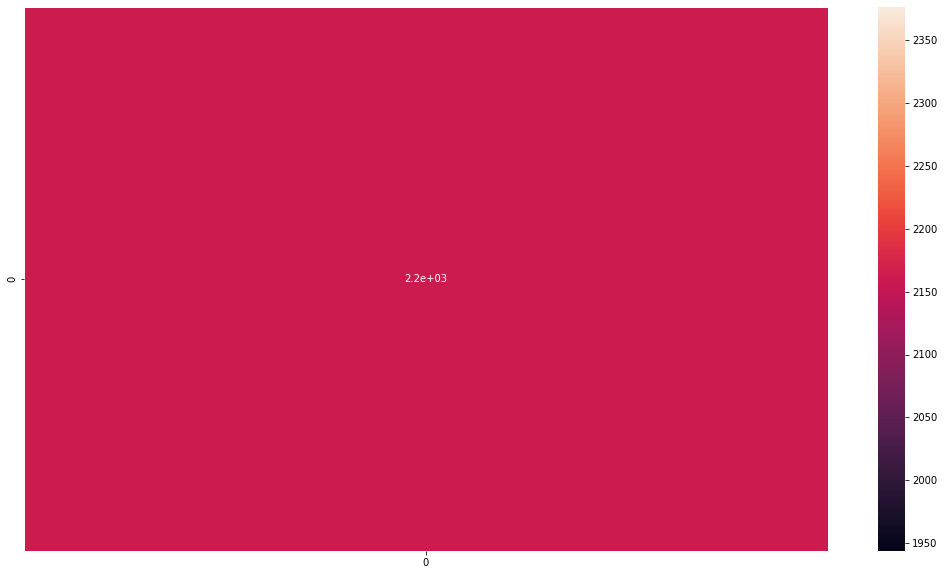

In [29]:
# cnn_graph = cnn.predict(X_test)
y_predicted_cnn = [int(i[0]) for i in cnn_graph]
y_test_g= [int(i[0]) for i in y_test]
# y_predicted_cnn = cnn_graph

cm_cnn = tf.math.confusion_matrix(labels=y_test_g, predictions=y_predicted_cnn)


fig, ax = plt.subplots(figsize=(18,10))         # Sample figsize in inches
sn.heatmap(cm_cnn, annot=True, linewidths=.5, ax=ax)

In [30]:
x=cnn.predict(X_test)
x[0] ,y_test[0]

(array([0.5837579 , 0.45994148, 0.6084145 , 0.08574519, 0.3045116 ],
       dtype=float32),
 array([0.4074074 , 0.7311321 , 0.6076923 , 0.10377359, 0.26153848],
       dtype=float32))

In [31]:
x[0] ,y_test[0]

(array([0.5837579 , 0.45994148, 0.6084145 , 0.08574519, 0.3045116 ],
       dtype=float32),
 array([0.4074074 , 0.7311321 , 0.6076923 , 0.10377359, 0.26153848],
       dtype=float32))